In [1]:
# import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy.optimize import curve_fit # for fitting curves
from scipy import stats # for correlation coefficients
import statsmodels.stats.multitest as multi # for multiple test adjustment
%matplotlib inline

# Read in and format data

In [2]:
# read in data
df = pd.read_csv("./licor_data.csv") 

# remove outliers
df = df[df.E>0] # remove negative and zero values for ln() later
df = df[df.A>0] # remove negative and zero values for ln() later

# create WUEi, instantaneous water use efficiency
df["WUEi"] = df["A"]/df["E"]

# remove outliers
df = df[df.WUEi<8000] # remove extreme WUEi values

# define function to model A/E
def func(x, m, b):
    return m*np.log(x) - b # natural log

E = df["E"].to_numpy() # convert to numpy array
A = df["A"].to_numpy() # convert to numpy array

# mask different factors
chard_df = df[df["scion"]=="chard"]
cab_df = df[df["scion"]=="cab"]

san_joaquin_df = df[df["location"]=="san joaquin"]
merced_df = df[df["location"]=="merced"]
madera_df = df[df["location"]=="madera"]

r1103P_df = df[df["rootstock"]=="1103P"]
r5C_df = df[df["rootstock"]=="5C"]
freedom_df = df[df["rootstock"]=="freedom"]

# Physiology figure

Text(0, 0.5, 'A, photosynthetic rate, $\\mu$mol $m^{-2}$ $s^{-1}$')

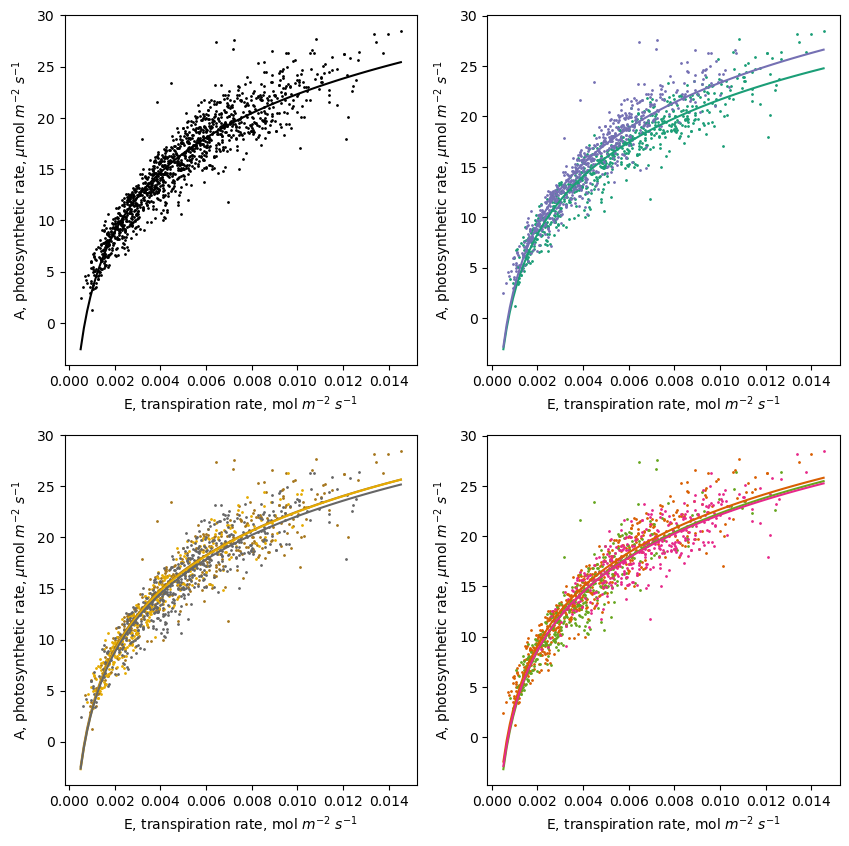

In [3]:
cab_col = "#7570b3" # lavender
chard_col = "#1b9e77" # green
san_joaquin_col = "#d95f02" # orange
merced_col = "#66a61e" # green
madera_col = "#e7298a" # magenta
col_5C = "#e6ab02" # gold
col_1103P = "#a6761d" # brown
col_freedom = "#666666" # charcoal

xrange = np.linspace(np.min(df["E"]), np.max(df["E"]), 100) # specify range to model
pt_s = 1

plt.figure(figsize=(10,10))

############
# all data #
############

params, covs = curve_fit(func, np.array(df["E"]), np.array(df["A"]) ) # fit a curve

ax1 = plt.subplot(2,2,1)
ax1.scatter(df["E"], df["A"], s=pt_s, c="k")
ax1.plot(xrange, func(xrange, params[0], params[1]), c="k")
ax1.set_xlabel(r"E, transpiration rate, mol $m^{-2}$ $s^{-1}$")
ax1.set_ylabel(r"A, photosynthetic rate, $\mu$mol $m^{-2}$ $s^{-1}$")

#########
# scion #
#########

chard_params, chard_covs = curve_fit(func, np.array(chard_df["E"]), np.array(chard_df["A"]) ) # fit curves
cab_params, cab_covs = curve_fit(func, np.array(cab_df["E"]), np.array(cab_df["A"]) )

ax2 = plt.subplot(2,2,2)
ax2.scatter(chard_df["E"], chard_df["A"], s=pt_s, c=chard_col)
ax2.scatter(cab_df["E"], cab_df["A"], s=pt_s, c=cab_col)
ax2.plot(xrange, func(xrange, chard_params[0], chard_params[1]), c=chard_col)
ax2.plot(xrange, func(xrange, cab_params[0], cab_params[1]), c=cab_col)

ax2.set_xlabel(r"E, transpiration rate, mol $m^{-2}$ $s^{-1}$")
ax2.set_ylabel(r"A, photosynthetic rate, $\mu$mol $m^{-2}$ $s^{-1}$")

#############
# rootstock #
#############

r1103P_params, r1103P_covs = curve_fit(func, np.array(r1103P_df["E"]), np.array(r1103P_df["A"]) ) # fit curves
r5C_params, r5C_covs = curve_fit(func, np.array(r5C_df["E"]), np.array(r5C_df["A"]) )
freedom_params, freedom_covs = curve_fit(func, np.array(freedom_df["E"]), np.array(freedom_df["A"]) )

ax3 = plt.subplot(2,2,3)
ax3.scatter(r1103P_df["E"], r1103P_df["A"], s=pt_s, c=col_1103P)
ax3.scatter(r5C_df["E"], r5C_df["A"], s=pt_s, c=col_5C)
ax3.scatter(freedom_df["E"], freedom_df["A"], s=pt_s, c=col_freedom)

ax3.plot(xrange, func(xrange, r1103P_params[0], r1103P_params[1]), c=col_1103P)
ax3.plot(xrange, func(xrange, r5C_params[0], r5C_params[1]), c=col_5C)
ax3.plot(xrange, func(xrange, freedom_params[0], freedom_params[1]), c=col_freedom)

ax3.set_xlabel(r"E, transpiration rate, mol $m^{-2}$ $s^{-1}$")
ax3.set_ylabel(r"A, photosynthetic rate, $\mu$mol $m^{-2}$ $s^{-1}$")

############
# location #
############

san_joaquin_params, san_joaquin_covs = curve_fit(func, np.array(san_joaquin_df["E"]), np.array(san_joaquin_df["A"]) ) # fit curves
merced_params, merced_params_covs = curve_fit(func, np.array(merced_df["E"]), np.array(merced_df["A"]) )
madera_params, madera_covs = curve_fit(func, np.array(madera_df["E"]), np.array(madera_df["A"]) )

ax4 = plt.subplot(2,2,4)
ax4.scatter(san_joaquin_df["E"], san_joaquin_df["A"], s=pt_s, c=san_joaquin_col)
ax4.scatter(merced_df["E"], merced_df["A"], s=pt_s, c=merced_col)
ax4.scatter(madera_df["E"], madera_df["A"], s=pt_s, c=madera_col)

ax4.plot(xrange, func(xrange, san_joaquin_params[0], san_joaquin_params[1]), c=san_joaquin_col)
ax4.plot(xrange, func(xrange, merced_params[0], merced_params[1]), c=merced_col)
ax4.plot(xrange, func(xrange, madera_params[0], madera_params[1]), c=madera_col)

ax4.set_xlabel(r"E, transpiration rate, mol $m^{-2}$ $s^{-1}$")
ax4.set_ylabel(r"A, photosynthetic rate, $\mu$mol $m^{-2}$ $s^{-1}$")

# plt.savefig("physiology_figure.jpg")


# Comparisons of fitted curves and WUEi

In [4]:
comp = pd.read_csv("./comparisons.csv") # read in comparisons to make
var1_len = [] # store number of samples in first comparison
var2_len = [] # store number of samples in second comparison
model_pvals = [] # store p vals for fitted curves
wuei_pvals = [] # store pvals for WUEi

for i in range(len(comp)):
    
    print(i)

    comp_ind = i

    # get the type of comparison
    comp_type = comp["type"].iloc[comp_ind]

    # get the scion
    common_scion = comp["scion"].iloc[comp_ind]

    # if a root comparison, set parameters
    if comp_type=="root":

        common_var = comp["loc1"].iloc[comp_ind]

        root1_id = comp["root1"].iloc[comp_ind]
        root2_id = comp["root2"].iloc[comp_ind]
        diff_var1 = comp["root1"].iloc[comp_ind]
        diff_var2 = comp["root2"].iloc[comp_ind]

        if root1_id == "5C":
            col1 = col_5C
        elif root1_id == "1103P":
            col1 = col_1103P
        elif root1_id == "freedom":
            col1 = col_freedom

        if root2_id == "5C":
            col2 = col_5C
        elif root2_id == "1103P":
            col2 = col_1103P
        elif root2_id == "freedom":
            col2 = col_freedom

    # if a location comparison, set parameters
    elif comp_type=="loc":

        common_var = comp["root1"].iloc[comp_ind]

        loc1_id = comp["loc1"].iloc[comp_ind]
        loc2_id = comp["loc2"].iloc[comp_ind]
        diff_var1 = comp["loc1"].iloc[comp_ind]
        diff_var2 = comp["loc2"].iloc[comp_ind]

        if loc1_id == "san joaquin":
            col1 = san_joaquin_col
        elif loc1_id == "merced":
            col1 = merced_col
        elif loc1_id == "madera":
            col1 = madera_col

        if loc2_id == "san joaquin":
            col2 = san_joaquin_col
        elif loc2_id == "merced":
            col2 = merced_col
        elif loc2_id == "madera":
            col2 = madera_col

    # set title
    title_name = str(comp_ind+1) + comp_type + common_scion + common_var + diff_var1 + diff_var2

    # get variable values
    scion = comp["scion"].iloc[comp_ind]
    loc1 = comp["loc1"].iloc[comp_ind]
    root1 = comp["root1"].iloc[comp_ind]
    loc2 = comp["loc2"].iloc[comp_ind]
    root2 = comp["root2"].iloc[comp_ind]

    # select physiology data for first comparison
    df1 = df[df["scion"]==scion]
    df1 = df1[df1["location"]==loc1]
    df1 = df1[df1["rootstock"]==root1]
    var1_len.append(len(df1))

    # select physiology data for second comparison
    df2 = df[df["scion"]==scion]
    df2 = df2[df2["location"]==loc2]
    df2 = df2[df2["rootstock"]==root2]
    var2_len.append(len(df2))

    # create overall dataframe
    df3 = pd.concat([df1, df2])

    # fit curves for df1, df2, and df3
    df1_params, df1_covs = curve_fit(func, np.array(df1["E"]), np.array(df1["A"]) ) 
    df2_params, df2_covs = curve_fit(func, np.array(df2["E"]), np.array(df2["A"]) ) 
    df3_params, df3_covs = curve_fit(func, np.array(df3["E"]), np.array(df3["A"]) ) 

    # calculate absolute value of WUEi residuals from model of A vs E
    df1["residuals"] = np.abs(df1["A"] - func(df1["E"], df1_params[0], df1_params[1]))
    df2["residuals"] = np.abs(df2["A"] - func(df2["E"], df2_params[0], df2_params[1]))
    df3["residuals"] = np.abs(df3["A"] - func(df3["E"], df3_params[0], df3_params[1]))

    # combine residuals from df1 and df2, and compare to overall residuals from df3
    within_resids = pd.concat([df1["residuals"],df2["residuals"]])
    p_value = stats.kruskal(within_resids, df3["residuals"])
    model_pvals.append(p_value[1])
    
    # calculate and store if differences in WUEi
    wuei_pvals.append( stats.kruskal(df1["WUEi"], df2["WUEi"])[1] )


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [5]:
comp["bonf_model_pvals"] = multi.multipletests(model_pvals, method="Bonferroni")[1]
comp["bonf_WUEi_pvals"] = multi.multipletests(wuei_pvals, method="Bonferroni")[1]

comp

# comp.to_csv("physiology_analysis.csv")

,ID,type,scion,loc1,root1,loc2,root2,bonf_model_pvals,bonf_WUEi_pvals
0,1,root,cab,san joaquin,5C,san joaquin,1103P,1.000000,7.626698e-02
1,2,root,cab,san joaquin,5C,san joaquin,freedom,1.000000,1.000000e+00
2,3,root,cab,san joaquin,1103P,san joaquin,freedom,1.000000,1.289206e-02
3,4,root,chard,san joaquin,5C,san joaquin,1103P,1.000000,1.070630e-03
4,5,root,chard,san joaquin,5C,san joaquin,freedom,1.000000,1.000000e+00
5,6,root,chard,san joaquin,1103P,san joaquin,freedom,1.000000,8.479935e-03
6,7,root,cab,merced,1103P,merced,freedom,0.702597,7.880032e-16
7,8,root,chard,merced,5C,merced,freedom,1.000000,1.243231e-16
8,9,root,cab,madera,5C,madera,freedom,1.000000,1.000000e+00
9,10,root,chard,madera,1103P,madera,freedom,1.000000,1.000000e+00
